# WRF-Chem Toolkit

Simple useful functions for routine statistical analysis and plots of WRF-Chem outputs (netCDF). Based on xarray and cartopy libraries.

In [1]:
#import modules
import xarray as xr
import cartopy 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpr

import warnings
warnings.filterwarnings('ignore')

In [2]:
datapath ='/exports/csce/datastore/geos/users/s1878599/BB_season2017_25cores_holmes/wrfout_d01_2017-10-1*'

In [3]:
#Merge datasets
ds = xr.open_mfdataset(datapath)

OSError: no files to open

In [4]:
#THIS SHOULD BE OK!!! 

timeavg = xr.Dataset(dict(ds.mean(dim='Time', keep_attrs=True).data_vars), coords = dict(ds.coords))

In [5]:
timeavg

<xarray.Dataset>
Dimensions:               (Time: 72, bio_emissions_dimension_stag: 364, bottom_top: 39, bottom_top_stag: 40, soil_layers_stag: 4, south_north: 119, south_north_stag: 120, west_east: 169, west_east_stag: 170)
Coordinates:
    XLONG                 (Time, south_north, west_east) float32 dask.array<shape=(72, 119, 169), chunksize=(24, 119, 169)>
    XTIME                 (Time) datetime64[ns] dask.array<shape=(72,), chunksize=(24,)>
    XLAT                  (Time, south_north, west_east) float32 dask.array<shape=(72, 119, 169), chunksize=(24, 119, 169)>
    XLONG_U               (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 119, 170), chunksize=(24, 119, 170)>
    XLAT_U                (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 119, 170), chunksize=(24, 119, 170)>
    XLONG_V               (Time, south_north_stag, west_east) float32 dask.array<shape=(72, 120, 169), chunksize=(24, 120, 169)>
    XLAT_V                (Time, south

In [6]:
timeavg.PM2_5_DRY

<xarray.DataArray 'PM2_5_DRY' (bottom_top: 39, south_north: 119, west_east: 169)>
dask.array<shape=(39, 119, 169), dtype=float32, chunksize=(39, 119, 169)>
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  pm2.5 aerosol dry mass
    units:        ug m^-3
    stagger:      

In [20]:
#modfied plot function

def var_plot_2D(dataset, var_name, level, title):
    
    var = dataset[var_name]
    
    #draw map
    ax = plt.subplot(projection=ccrs.PlateCarree())
    
    # draw coastlines and borders
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, lw=0.5)
    
    #draw meridians and parallels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}
    
    #plot SURFACE data
    long = dataset.XLONG.values[0,:,:]
    lat  = dataset.XLAT.values[0,:,:]
    var_values= var[level,:,:] 
    res = 15 #controls the resolution for the map plotting.
    
    cs=plt.contourf( long, lat, var_values, res,
             transform=ccrs.PlateCarree(), cmap=plt.cm.YlGnBu)

    #colorbar
    cbar = plt.colorbar(cs) # pad=0.2 #format='%.2e'
    cbar.set_label(var.units)
    ax.set_title(title)
    
    #plotting parameters
    plt.rcParams['figure.figsize'] = [10, 5]


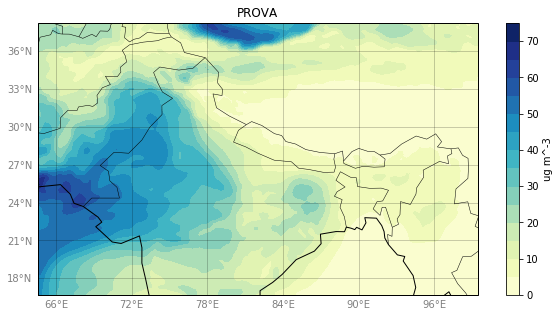

In [21]:
var_plot_2D(timeavg, 'PM2_5_DRY', 10, 'PROVA')

In [22]:
timeavg

<xarray.Dataset>
Dimensions:               (Time: 72, bio_emissions_dimension_stag: 364, bottom_top: 39, bottom_top_stag: 40, soil_layers_stag: 4, south_north: 119, south_north_stag: 120, west_east: 169, west_east_stag: 170)
Coordinates:
    XLONG                 (Time, south_north, west_east) float32 dask.array<shape=(72, 119, 169), chunksize=(24, 119, 169)>
    XTIME                 (Time) datetime64[ns] dask.array<shape=(72,), chunksize=(24,)>
    XLAT                  (Time, south_north, west_east) float32 dask.array<shape=(72, 119, 169), chunksize=(24, 119, 169)>
    XLONG_U               (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 119, 170), chunksize=(24, 119, 170)>
    XLAT_U                (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 119, 170), chunksize=(24, 119, 170)>
    XLONG_V               (Time, south_north_stag, west_east) float32 dask.array<shape=(72, 120, 169), chunksize=(24, 120, 169)>
    XLAT_V                (Time, south

In [9]:
# space average function
spaceavg = xr.Dataset(dict(ds.mean(dim= ['south_north','west_east'], keep_attrs=True).data_vars), coords = dict(ds.coords))

In [10]:
spaceavg

<xarray.Dataset>
Dimensions:               (Time: 72, bio_emissions_dimension_stag: 364, bottom_top: 39, bottom_top_stag: 40, soil_layers_stag: 4, south_north: 119, south_north_stag: 120, west_east: 169, west_east_stag: 170)
Coordinates:
    XTIME                 (Time) datetime64[ns] dask.array<shape=(72,), chunksize=(24,)>
    XLONG                 (Time, south_north, west_east) float32 dask.array<shape=(72, 119, 169), chunksize=(24, 119, 169)>
    XLAT                  (Time, south_north, west_east) float32 dask.array<shape=(72, 119, 169), chunksize=(24, 119, 169)>
    XLONG_U               (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 119, 170), chunksize=(24, 119, 170)>
    XLAT_U                (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 119, 170), chunksize=(24, 119, 170)>
    XLONG_V               (Time, south_north_stag, west_east) float32 dask.array<shape=(72, 120, 169), chunksize=(24, 120, 169)>
    XLAT_V                (Time, south

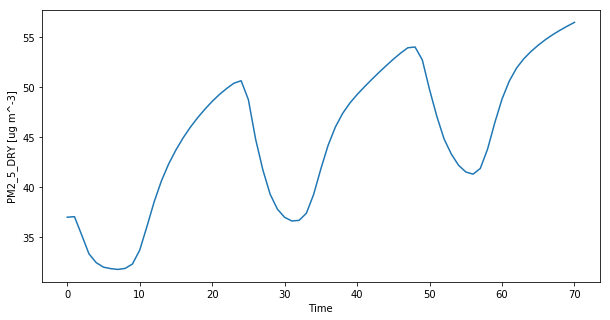

In [11]:
#1D plot
spaceavg.PM2_5_DRY[1:,0].plot()

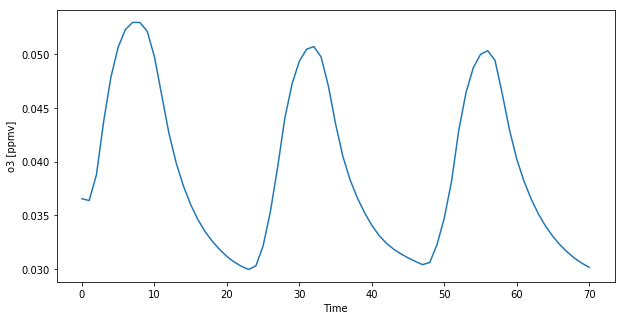

In [12]:
spaceavg.o3[1:,0].plot()

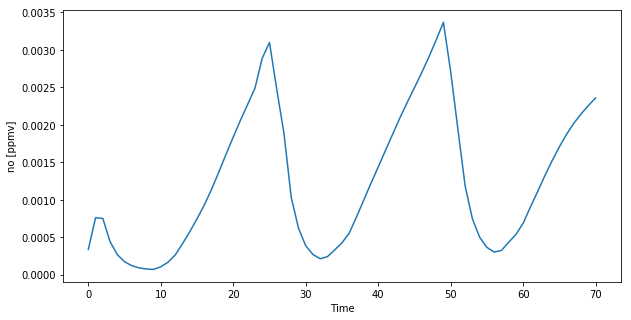

In [13]:
spaceavg.no[1:,0].plot()

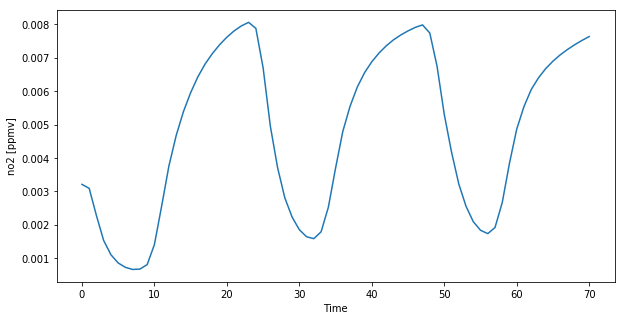

In [14]:
spaceavg.no2[1:,0].plot()

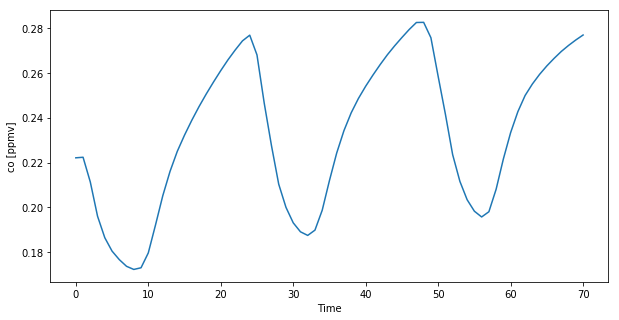

In [15]:
spaceavg.co[1:,0].plot()

In [16]:
def space_subset(dataset, lat_lim, long_lim ):
    """
    Extract spatial subset of data given lat and long limits.
    
    
    """
    
    s_subset= ds.where((long_lim[0] < ds.XLONG) & (ds.XLONG < long_lim[1])
         & (lat_lim[0] < ds.XLAT) & (ds.XLAT < lat_lim[1]), drop=True)
  
    return s_subset

In [26]:
s_subset=space_subset(timeavg, [20,35], [60,90])

In [29]:
timeavg.PM2_5_DRY

<xarray.DataArray 'PM2_5_DRY' (bottom_top: 39, south_north: 119, west_east: 169)>
dask.array<shape=(39, 119, 169), dtype=float32, chunksize=(39, 119, 169)>
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  pm2.5 aerosol dry mass
    units:        ug m^-3
    stagger:      

In [33]:
s_subset.PM2_5_DRY.XTIME.values

array(['2017-10-11T00:00:00.000000000', '2017-10-11T01:00:00.000000000',
       '2017-10-11T02:00:00.000000000', '2017-10-11T03:00:00.000000000',
       '2017-10-11T04:00:00.000000000', '2017-10-11T05:00:00.000000000',
       '2017-10-11T06:00:00.000000000', '2017-10-11T07:00:00.000000000',
       '2017-10-11T08:00:00.000000000', '2017-10-11T09:00:00.000000000',
       '2017-10-11T10:00:00.000000000', '2017-10-11T11:00:00.000000000',
       '2017-10-11T12:00:00.000000000', '2017-10-11T13:00:00.000000000',
       '2017-10-11T14:00:00.000000000', '2017-10-11T15:00:00.000000000',
       '2017-10-11T16:00:00.000000000', '2017-10-11T17:00:00.000000000',
       '2017-10-11T18:00:00.000000000', '2017-10-11T19:00:00.000000000',
       '2017-10-11T20:00:00.000000000', '2017-10-11T21:00:00.000000000',
       '2017-10-11T22:00:00.000000000', '2017-10-11T23:00:00.000000000',
       '2017-10-12T00:00:00.000000000', '2017-10-12T01:00:00.000000000',
       '2017-10-12T02:00:00.000000000', '2017-10-12

In [34]:
s_subset_avg = xr.Dataset(dict(s_subset.mean(dim='Time', keep_attrs=True).data_vars), coords = dict(s_subset.coords))

In [35]:
s_subset_avg

<xarray.Dataset>
Dimensions:               (Time: 72, bio_emissions_dimension_stag: 364, bottom_top: 39, bottom_top_stag: 40, soil_layers_stag: 4, south_north: 82, south_north_stag: 120, west_east: 123, west_east_stag: 170)
Coordinates:
    XLONG                 (Time, south_north, west_east) float32 dask.array<shape=(72, 82, 123), chunksize=(24, 82, 123)>
    XTIME                 (Time) datetime64[ns] dask.array<shape=(72,), chunksize=(24,)>
    XLAT                  (Time, south_north, west_east) float32 dask.array<shape=(72, 82, 123), chunksize=(24, 82, 123)>
    XLONG_U               (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 82, 170), chunksize=(24, 82, 170)>
    XLAT_U                (Time, south_north, west_east_stag) float32 dask.array<shape=(72, 82, 170), chunksize=(24, 82, 170)>
    XLONG_V               (Time, south_north_stag, west_east) float32 dask.array<shape=(72, 120, 123), chunksize=(24, 120, 123)>
    XLAT_V                (Time, south_north_st

NOTE!!! NEED TO FIRST TAKE SPACE SUBSET AD THEN TIME AVERAGE..OTHERWISE ds.where RESTORE ALL THE TIMES!!! NEED TO FIX THAT...

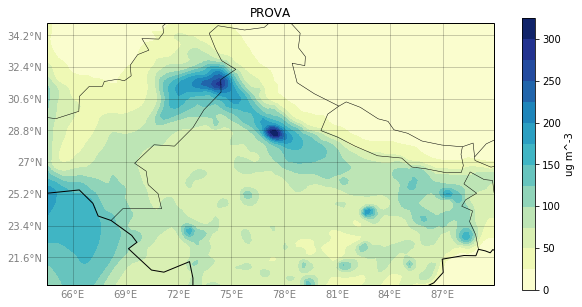

In [37]:
var_plot_2D(s_subset_avg, 'PM2_5_DRY',0, 'PROVA')

In [43]:
ds.XTIME.values

array(['2017-10-11T00:00:00.000000000', '2017-10-11T01:00:00.000000000',
       '2017-10-11T02:00:00.000000000', '2017-10-11T03:00:00.000000000',
       '2017-10-11T04:00:00.000000000', '2017-10-11T05:00:00.000000000',
       '2017-10-11T06:00:00.000000000', '2017-10-11T07:00:00.000000000',
       '2017-10-11T08:00:00.000000000', '2017-10-11T09:00:00.000000000',
       '2017-10-11T10:00:00.000000000', '2017-10-11T11:00:00.000000000',
       '2017-10-11T12:00:00.000000000', '2017-10-11T13:00:00.000000000',
       '2017-10-11T14:00:00.000000000', '2017-10-11T15:00:00.000000000',
       '2017-10-11T16:00:00.000000000', '2017-10-11T17:00:00.000000000',
       '2017-10-11T18:00:00.000000000', '2017-10-11T19:00:00.000000000',
       '2017-10-11T20:00:00.000000000', '2017-10-11T21:00:00.000000000',
       '2017-10-11T22:00:00.000000000', '2017-10-11T23:00:00.000000000',
       '2017-10-12T00:00:00.000000000', '2017-10-12T01:00:00.000000000',
       '2017-10-12T02:00:00.000000000', '2017-10-12

In [48]:
a = np.array([np.datetime64('2015-07-04 12:59:59.50', 'ns')])

In [49]:
a

array(['2015-07-04T12:59:59.500000000'], dtype='datetime64[ns]')

In [54]:
a[0]

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [68]:
b = ds.where((ds.XTIME > np.datetime64('2017-10-11T01:00:00.000000000')) &  (ds.XTIME < np.datetime64('2017-10-11T23:00:00.000000000')), drop=True)

In [69]:
b

<xarray.Dataset>
Dimensions:               (Time: 21, bio_emissions_dimension_stag: 364, bottom_top: 39, bottom_top_stag: 40, soil_layers_stag: 4, south_north: 119, south_north_stag: 120, west_east: 169, west_east_stag: 170)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 dask.array<shape=(21, 119, 169), chunksize=(21, 119, 169)>
    XLONG                 (Time, south_north, west_east) float32 dask.array<shape=(21, 119, 169), chunksize=(21, 119, 169)>
    XTIME                 (Time) datetime64[ns] dask.array<shape=(21,), chunksize=(21,)>
    XLAT_U                (Time, south_north, west_east_stag) float32 dask.array<shape=(21, 119, 170), chunksize=(21, 119, 170)>
    XLONG_U               (Time, south_north, west_east_stag) float32 dask.array<shape=(21, 119, 170), chunksize=(21, 119, 170)>
    XLAT_V                (Time, south_north_stag, west_east) float32 dask.array<shape=(21, 120, 169), chunksize=(21, 120, 169)>
    XLONG_V               (Time, south